In [1]:
import numpy as np
import os
import tensorflow as tf
import cv2 as cv
import keras
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
keras.backend.tensorflow_backend.set_session(tf.Session(config=config))


# Read the graph.
with tf.gfile.FastGFile('/home/opencv/src/object_detection_demo_flow/frozen_model/frozen_inference_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

    

Using TensorFlow backend.


Instructions for updating:
Use tf.gfile.GFile.


In [2]:
sess = tf.Session()
    
# Restore session
sess.graph.as_default()
tf.import_graph_def(graph_def, name='')

# Read and preprocess an image.
img = cv.imread('/home/opencv/src//object_detection_demo_flow/data/images/final_test/20200811_wooden_rgb_0019.jpg')
img2 = img.copy()
rows = img.shape[0]
cols = img.shape[1]
img = cv.resize(img, (300, 300))
img = img[:, :, [2, 1, 0]]  # BGR2RGB

In [3]:
# Run the model
out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                sess.graph.get_tensor_by_name('detection_scores:0'),
                sess.graph.get_tensor_by_name('detection_boxes:0'),
                sess.graph.get_tensor_by_name('detection_classes:0')],
               feed_dict={'image_tensor:0': img.reshape(1, img.shape[0], img.shape[1], 3)})

In [4]:
for i in range(4):
    print(i, out[i])
    

0 [100.]
1 [[0.6884173  0.45776528 0.43599737 0.30692273 0.0993422  0.06625029
  0.06373104 0.05386591 0.05114433 0.04238948 0.03805918 0.03597254
  0.02453774 0.01478595 0.01194817 0.01172531 0.01069242 0.00973412
  0.0095984  0.00955945 0.00917071 0.00894818 0.00877374 0.00731683
  0.00701892 0.00677809 0.00668886 0.00660691 0.00592896 0.00577497
  0.00522736 0.00519794 0.00499254 0.00488454 0.00463119 0.00459355
  0.00451797 0.00448427 0.0042479  0.0041078  0.00410753 0.00409034
  0.00400573 0.00398558 0.00395966 0.00395367 0.00391459 0.00382626
  0.00377685 0.0037024  0.00364223 0.00362456 0.00360507 0.00353006
  0.00332198 0.0032441  0.00309026 0.00301108 0.00297531 0.00291467
  0.00290093 0.0028902  0.00284812 0.00276196 0.0027326  0.00270659
  0.00267577 0.00266641 0.00264931 0.00261942 0.00261435 0.00260988
  0.00260207 0.00259808 0.00257614 0.00250062 0.00249478 0.00248843
  0.00248763 0.00248164 0.00247148 0.00245178 0.00243691 0.00243044
  0.00241408 0.00239459 0.00238878 0.

In [5]:
# Visualize detected bounding boxes.
num_detections = int(out[0][0])
print(num_detections)

img = img2.copy()
for i in range(num_detections):
    if i > 3:
        break
    classId = int(out[3][0][i])
    score = float(out[1][0][i])
    bbox = [float(v) for v in out[2][0][i]]
    if score > 0.1:
        x = int(bbox[1] * cols)
        y = int(bbox[0] * rows)
        
        right = int(bbox[3] * cols)
        bottom = int(bbox[2] * rows)

        cv.rectangle(img2, (int(x), int(y)), (int(right), int(bottom)), (125, 255, 51), thickness=2)

100


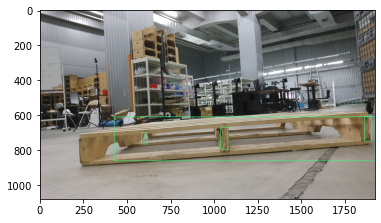

In [6]:
import matplotlib.pyplot as plt
plt.imshow(img2[:, :, ::-1])


# cv.imshow('TensorFlow MobileNet-SSD', img)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [48]:
import tensorflow as tf
from tensorflow.python.platform import gfile
GRAPH_PB_PATH = '/home/opencv/src/object_detection_demo_flow/frozen_inference_graph.pb'
with tf.Session() as sess:
   print("load graph")
   with gfile.FastGFile(GRAPH_PB_PATH,'rb') as f:
       graph_def = tf.GraphDef()
   graph_def.ParseFromString(f.read())
   sess.graph.as_default()
   tf.import_graph_def(graph_def, name='')
   graph_nodes=[n for n in graph_def.node]
   names = []
   for t in graph_nodes:
      names.append(t.name)
   print(names)

load graph
['image_tensor', 'Cast', 'Preprocessor/map/Shape', 'Preprocessor/map/strided_slice/stack', 'Preprocessor/map/strided_slice/stack_1', 'Preprocessor/map/strided_slice/stack_2', 'Preprocessor/map/strided_slice', 'Preprocessor/map/TensorArray', 'Preprocessor/map/TensorArrayUnstack/Shape', 'Preprocessor/map/TensorArrayUnstack/strided_slice/stack', 'Preprocessor/map/TensorArrayUnstack/strided_slice/stack_1', 'Preprocessor/map/TensorArrayUnstack/strided_slice/stack_2', 'Preprocessor/map/TensorArrayUnstack/strided_slice', 'Preprocessor/map/TensorArrayUnstack/range/start', 'Preprocessor/map/TensorArrayUnstack/range/delta', 'Preprocessor/map/TensorArrayUnstack/range', 'Preprocessor/map/TensorArrayUnstack/TensorArrayScatter/TensorArrayScatterV3', 'Preprocessor/map/Const', 'Preprocessor/map/TensorArray_1', 'Preprocessor/map/TensorArray_2', 'Preprocessor/map/while/iteration_counter', 'Preprocessor/map/while/Enter', 'Preprocessor/map/while/Enter_1', 'Preprocessor/map/while/Enter_2', 'Prep

In [15]:
from tensorflow.python.tools import freeze_graph

    def save(self, directory, filename):

        if not os.path.exists(directory):
            os.makedirs(directory)
        filepath = os.path.join(directory, filename + '.ckpt')
        self.saver.save(self.sess, filepath)
        return filepath

    def save_as_pb(self, directory, filename):

        if not os.path.exists(directory):
            os.makedirs(directory)

        # Save check point for graph frozen later
        ckpt_filepath = self.save(directory=directory, filename=filename)
        pbtxt_filename = filename + '.pbtxt'
        pbtxt_filepath = os.path.join(directory, pbtxt_filename)
        pb_filepath = os.path.join(directory, filename + '.pb')
        # This will only save the graph but the variables will not be saved.
        # You have to freeze your model first.
        tf.train.write_graph(graph_or_graph_def=self.sess.graph_def, logdir=directory, name=pbtxt_filename, as_text=True)

        # Freeze graph
        # Method 1
        freeze_graph.freeze_graph(input_graph=pbtxt_filepath, input_saver='', input_binary=False, input_checkpoint=ckpt_filepath, output_node_names='cnn/output', restore_op_name='save/restore_all', filename_tensor_name='save/Const:0', output_graph=pb_filepath, clear_devices=True, initializer_nodes='')
        

IndentationError: unexpected indent (<ipython-input-15-7c31d486886e>, line 3)

In [79]:
s = SavePb()
s.save('/home/opencv/src/object_detection_demo_flow/fine_tuned_model_old','prova')

AttributeError: module 'tensorflow._api.v1.train' has no attribute 'saver'

In [61]:
import tensorflow as tf
import numpy as np
class CNN(object):

    def __init__(self, model_filepath):

        # The file path of model
        self.model_filepath = model_filepath
        # Initialize the model
        self.load_graph(model_filepath = self.model_filepath)

    def load_graph(self, model_filepath):
        '''
        Lode trained model.
        '''
        print('Loading model...')
        self.graph = tf.Graph()

        with tf.gfile.GFile(model_filepath, 'rb') as f:
            graph_def = tf.GraphDef()
            graph_def.ParseFromString(f.read())

        print('Check out the input placeholders:')
        nodes = [n.name + ' => ' +  n.op for n in graph_def.node if n.op in ('Placeholder')]
        for node in nodes:
            print(node)

        with self.graph.as_default():
        	# Define input tensor
        	self.input = tf.placeholder(np.float32, shape = [None, 32, 32, 3], name='input')
        	self.dropout_rate = tf.placeholder(tf.float32, shape = [], name = 'dropout_rate')
        	tf.import_graph_def(graph_def, {'input': self.input, 'dropout_rate': self.dropout_rate})

        self.graph.finalize()

        print('Model loading complete!')

        # Get layer names
        layers = [op.name for op in self.graph.get_operations()]
        for layer in layers:
            print(layer)
        
        """
        # Check out the weights of the nodes
        weight_nodes = [n for n in graph_def.node if n.op == 'Const']
        for n in weight_nodes:
            print("Name of the node - %s" % n.name)
            # print("Value - " )
            # print(tensor_util.MakeNdarray(n.attr['value'].tensor))
        """

        # In this version, tf.InteractiveSession and tf.Session could be used interchangeably. 
        # self.sess = tf.InteractiveSession(graph = self.graph)
        self.sess = tf.Session(graph = self.graph)

    def test(self, data):

        # Know your output node name
        output_tensor = self.graph.get_tensor_by_name("import/cnn/output:0")
        output = self.sess.run(output_tensor, feed_dict = {self.input: data, self.dropout_rate: 0})

        return output

In [62]:
def test_from_frozen_graph(model_filepath):

    tf.reset_default_graph()

    # Load CIFAR10 dataset
    cifar10 = CIFAR10()
    x_test = cifar10.x_test
    y_test = cifar10.y_test
    y_test_onehot = cifar10.y_test_onehot
    num_classes = cifar10.num_classes
    input_size = cifar10.input_size

    # Test 500 samples
    x_test = x_test[0:500]
    y_test = y_test[0:500]

    model = CNN(model_filepath = model_filepath)

    test_prediction_onehot = model.test(data = x_test)
    test_prediction = np.argmax(test_prediction_onehot, axis = 1).reshape((-1,1))
    test_accuracy = model_accuracy(label = y_test, prediction = test_prediction)

    print('Test Accuracy: %f' % test_accuracy)
    

In [63]:
import os
path = '/home/opencv/src/object_detection_demo_flow/fine_tuned_model_old/saved_model/saved_model.pb'
print(path)



/home/opencv/src/object_detection_demo_flow/fine_tuned_model_old/saved_model/saved_model.pb


In [64]:
net = CNN(path)

Loading model...


DecodeError: Error parsing message